# Project: Machine Learning

**Instructions for Students:**

Please carefully follow these steps to complete and submit your project:

1. **Make a copy of the Project**: Please make a copy of this project either to your own Google Drive or download locally. Work on the copy of the project. The master project is **Read-Only**, meaning you can edit, but it will not be saved when you close the master project. To avoid total loss of your work, remember to make a copy.

2. **Completing the Project**: You are required to work on and complete all tasks in the provided project. Be disciplined and ensure that you thoroughly engage with each task.
   
3. **Creating a Google Drive Folder**: Each of you must create a new folder on your Google Drive. This will be the repository for all your completed project files, aiding you in keeping your work organized and accessible.
   
4. **Uploading Completed Project**: Upon completion of your project, make sure to upload all necessary files, involving codes, reports, and related documents into the created Google Drive folder. Save this link in the 'Student Identity' section and also provide it as the last parameter in the `submit` function that has been provided.
   
5. **Sharing Folder Link**: You're required to share the link to your project Google Drive folder. This is crucial for the submission and evaluation of your project.
   
6. **Setting Permission to Public**: Please make sure your Google Drive folder is set to public. This allows your instructor to access your solutions and assess your work correctly.

Adhering to these procedures will facilitate a smooth project evaluation process for you and the reviewers.

## Project Description

In this Machine Learning Project, you will create your own supervised Machine Learning (ML) model. We will use the full FIFA21 Dataset and we will identify players that are above average.

We will use the column "Overall" with a treshold of 75 to define players that are 'Valuable'. This will become our target output which we need for a supervised ML model. Because we use the "Overall" as our target output, you cannot use "Overall" in your features, this will be explained further below.

This project will provide a comprehensive overview of your abilities in machine learning, from understanding the problem, choosing the right model, training, and optimizing it.

## Grading Criteria

Your score will be awarded based on the following criteria:
* 100: The model has an accuracy of more than 90% and an F1 score of more than 80%. This model is excellent and demonstrates a strong understanding of the task.
* 90: The model has an accuracy of more than 85% and an F1 score of more than 75%. This model is very good, with some room for improvement.
* 80: The model has an accuracy of more than 80% and an F1 score between 70% and 75%. This model is fairly good but needs improvement in balancing precision and recall.
* 70: The model has an accuracy of more than 70% and an F1 score between 60% and 70%. This model is below average and needs significant improvement.
* 60 or below: The model has an accuracy of less than 70% or an F1 score of less than 60%, or the student did not submit the accuracy and F1 score. This model is poor and needs considerable improvement.

Rmember to make a copy of this notebook in your Google Drive and work in your own copy.

Happy modeling!

>Note: If you get the accuracy of 100% and F1 score of 100%, while it may earn you good grades, it's an indication of overfitting.

## Student Identity

In [ ]:
# Write any package/module installation that you need
# pip install goes here, this helps declutter your output below

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import time

## Load the dataset and clean it

In this task, you will prepare and load your dataset. You need to download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

>Note: Make sure you download FIFA 21 dataset.
>
>![FIFA21 Dataset](https://storage.googleapis.com/rg-ai-bootcamp/projects/fifa21_dataset-min.png)

After you download the dataset, you will then import the dataset then you will clean the data. For example there may be some empty cell in the dataset which you need to fill. Maybe there are also data that you need to convert to numeric value for analysis. Identify the data that is incomplete and fix them.

In the code block below, you can use the comments to guide you on what to do.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your preprocessing and data cleaning here and Load your data
df = pd.read_csv('/content/drive/MyDrive/dataset/FIFA21_official_data.csv')

# Check your data for empty cell
df.isna().sum()
df = df.drop(columns=['Marking', 'Loaned From', 'Photo', 'Flag' , 'Club Logo', 'Position'])
df = df.dropna()
# Fill the empty cell with data or drop the column
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14843 entries, 0 to 17106
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        14843 non-null  int64  
 1   Name                      14843 non-null  object 
 2   Age                       14843 non-null  int64  
 3   Nationality               14843 non-null  object 
 4   Overall                   14843 non-null  int64  
 5   Potential                 14843 non-null  int64  
 6   Club                      14843 non-null  object 
 7   Value                     14843 non-null  object 
 8   Wage                      14843 non-null  object 
 9   Special                   14843 non-null  int64  
 10  Preferred Foot            14843 non-null  object 
 11  International Reputation  14843 non-null  float64
 12  Weak Foot                 14843 non-null  float64
 13  Skill Moves               14843 non-null  float64
 14  Work Rate  

In [ ]:
# 1. Remove '€' symbol
df[['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].apply(lambda x: x.str.replace('€', ''))

# 2. Replace 'K' with '*1000' and 'M' with '*1000000'
df[['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].apply(lambda x: x.str.replace('K', '*1000').str.replace('M', '*1000000'))

# 3. Evaluate the expressions and convert to numeric
def convert_to_numeric(x):
    if isinstance(x, str):
        return eval(x)
    return x

df[['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].applymap(convert_to_numeric).astype(float).astype(int)

df.head()

<ipython-input-18-7041a2c87ffd>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Value', 'Wage', 'Release Clause']] = df[['Value', 'Wage', 'Release Clause']].applymap(convert_to_numeric).astype(float).astype(int)


,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Jersey Number,Joined,Contract Valid Until,Height,Weight,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,Uruguay,87,87,Atlético Madrid,31500000,115000,2316,Right,5.0,4.0,3.0,High/ Medium,PLAYER_BODY_TYPE_374,Yes,9.0,"Sep 25, 2020",2022,6'0,190lbs,80.0,92.0,84.0,83.0,90.0,84.0,86.0,82.0,77.0,84.0,72.0,68.0,76.0,92.0,78.0,89.0,69.0,78.0,85.0,88.0,87.0,41.0,91.0,84.0,83.0,85.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,64599999,57.0
1,192985,K. De Bruyne,29,Belgium,91,91,Manchester City,87000000,370000,2304,Right,4.0,5.0,4.0,High/ High,PLAYER_BODY_TYPE_321,Yes,17.0,"Aug 30, 2015",2023,5'11,154lbs,94.0,82.0,55.0,94.0,82.0,88.0,85.0,83.0,93.0,92.0,77.0,76.0,78.0,91.0,76.0,91.0,63.0,89.0,74.0,91.0,76.0,66.0,88.0,94.0,84.0,91.0,65.0,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,161000000,68.0
2,212198,Bruno Fernandes,25,Portugal,87,90,Manchester United,63000000,195000,2303,Right,2.0,4.0,4.0,High/ High,Lean (170-185),Yes,18.0,"Jan 30, 2020",2025,5'10,152lbs,87.0,77.0,58.0,88.0,86.0,85.0,86.0,87.0,87.0,88.0,78.0,76.0,79.0,86.0,79.0,89.0,72.0,94.0,67.0,89.0,70.0,74.0,83.0,90.0,91.0,86.0,67.0,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,124400000,72.0
3,194765,A. Griezmann,29,France,87,87,FC Barcelona,50500000,290000,2288,Left,4.0,3.0,4.0,Medium/ Medium,PLAYER_BODY_TYPE_266,Yes,7.0,"Jul 12, 2019",2024,5'9,161lbs,83.0,88.0,83.0,84.0,87.0,87.0,86.0,85.0,82.0,89.0,80.0,79.0,91.0,92.0,83.0,81.0,90.0,86.0,63.0,82.0,73.0,49.0,89.0,85.0,86.0,89.0,54.0,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,103500000,59.0
4,224334,M. Acuña,28,Argentina,83,83,Sevilla FC,22000000,41000,2280,Left,2.0,3.0,4.0,High/ High,Stocky (170-185),No,19.0,"Sep 14, 2020",2024,5'8,152lbs,87.0,66.0,57.0,81.0,68.0,87.0,88.0,75.0,78.0,87.0,77.0,75.0,82.0,83.0,90.0,82.0,63.0,90.0,80.0,81.0,84.0,78.0,81.0,82.0,76.0,87.0,82.0,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,46200000,79.0


In [ ]:
df_selected = df[['Name', 'Value', 'Wage', 'Release Clause', 'Potential', 'Overall']].sample(20)
df_selected

,Name,Value,Wage,Release Clause,Potential,Overall
11816,H. Vera Oviedo,375000,3000,544000,64,64
13383,B. Mugabi,240000,1000,438000,64,60
329,V. Rongier,18500000,45000,36500000,83,80
942,M. Albrighton,7500000,66000,14300000,76,76
12316,K. Chapelle,120000,850,240000,65,54
7152,M. Schäffler,3600000,12000,5800000,73,73
4127,G. Tigiev,1200000,20000,2000000,74,69
6075,J. Correa,1900000,6000,4000000,70,70
16378,R. Majecki,1300000,8000,2700000,80,68
2707,Matheus Fernandes,1400000,37000,3200000,77,68


## Build and Train your model

In this task you will analyze the data and select the features that is best at predicting if the Player is a 'Valuable' player or not.

The first step is to **define the target output** that you will use for training. Here's an example of how to create a target output:
- `df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 50 else 0) #Define the OK Player using treshold of 50.`

Next you will **identify the features** that will best predict a 'Valuable' player. You are required to **submit the features you selected** in the Submission section below.

> **Because we use the "Overall" as our target output, the use of "Overall" in your features is not allowed. You will automatically get 0 if you submit "Overall" in your features. The use of "Best Overall Rating" is also not allowed and will automatically get you a score of 0.**

Once you identify the features, you will then **split the data** into Training set and Testing/Validation set.

Depending on the features you selected, **you may need to scale the features**.

Now you will **train your model, choose the algorithm** you are going to use carefully to make sure it gives the best result.

Once you have trained your model, you need to test the model effectiveness. **Make predictions against your Testing/Validation set** and evaluate your model. You are required to **submit the Accuracy Score and F1 score** in the Submission section below.

In the code block below, you can use the comments to guide you on what to do.

We have also provided 3 variables that you must use in your code, `ml_features`, `ml_accuracy` and `ml_f1_score`. You can move the variables around your code, assign values to them, but you cannot delete them.

In [ ]:
df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 75 else 0) #Define the OK Player using treshold of 50.
# Identify the features you will use in your model
ml_features = ['Value', 'Release Clause', 'Potential']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14843 entries, 0 to 17106
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        14843 non-null  int64  
 1   Name                      14843 non-null  object 
 2   Age                       14843 non-null  int64  
 3   Nationality               14843 non-null  object 
 4   Overall                   14843 non-null  int64  
 5   Potential                 14843 non-null  int64  
 6   Club                      14843 non-null  object 
 7   Value                     14843 non-null  int64  
 8   Wage                      14843 non-null  int64  
 9   Special                   14843 non-null  int64  
 10  Preferred Foot            14843 non-null  object 
 11  International Reputation  14843 non-null  float64
 12  Weak Foot                 14843 non-null  float64
 13  Skill Moves               14843 non-null  float64
 14  Work Rate  

In [ ]:
# # Write your code here

# # Define the target output (Good >= 75)

# df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 75 else 0) #Define the OK Player using treshold of 50.
# # Identify the features you will use in your model
# ml_features = ['Value', 'Release Clause', 'Potential']

# # Split data into training set and test set
# X = df[['Value', 'Release Clause', 'Potential']]  # Fitur
# Y = df[['OK Player']]  # Target

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# # Train the model
# xgb = XGBClassifier(n_estimators=100)
# training_start = time.perf_counter()
# xgb.fit(X_train, y_train)
# training_end = time.perf_counter()
# prediction_start = time.perf_counter()
# preds = xgb.predict(X_test)
# prediction_end = time.perf_counter()
# acc_xgb = (preds == y_test).sum().astype(float) / len(preds)*100
# xgb_train_time = training_end-training_start
# xgb_prediction_time = prediction_end-prediction_start
# print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
# print("Time consumed for training: %4.3f" % (xgb_train_time))
# print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

# # Make predictions using the test set


# # Evaluate the model
# ml_accuracy = print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
# ml_f1_score = print("F1-Score:", f1_score(y_test, preds, average='micro'))



In [ ]:
# Write your code here

# Define the target output (Good >= 75)

df['OK Player'] = df['Overall'].apply(lambda x: 1 if x >= 75 else 0) #Define the OK Player using treshold of 50.
# Identify the features you will use in your model
ml_features = ['Value', 'Release Clause', 'Potential']

# Split data into training set and test set
X = df[['Value', 'Release Clause', 'Potential']]  # Fitur
Y = df[['OK Player']]  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Train the model
xgb = XGBClassifier(n_estimators=100)
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()

# Convert preds to a Pandas Series with the same index as y_test
preds_series = pd.Series(preds, index=y_test.index)

# Now compare the Series objects
acc_xgb = (preds_series == y_test['OK Player']).sum().astype(float) / len(preds_series)*100
# Extract values from y_test to compare with preds
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("Time consumed for training: %4.3f" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

# Make predictions using the test set
ml_accuracy = acc_xgb
ml_f1_score = f1_score(y_test, preds, average='micro')

# Evaluate the model
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))
print("F1-Score:", f1_score(y_test, preds, average='micro'))

XGBoost's prediction accuracy is: 97.37
Time consumed for training: 0.230
Time consumed for prediction: 0.00989 seconds
XGBoost's prediction accuracy is: 97.37
F1-Score: 0.9737285281239475


In [ ]:
print(ml_accuracy)

97.37285281239475


## Submission

Once you are satisfied with the performance of your model, then you run the code block below to submit your project.


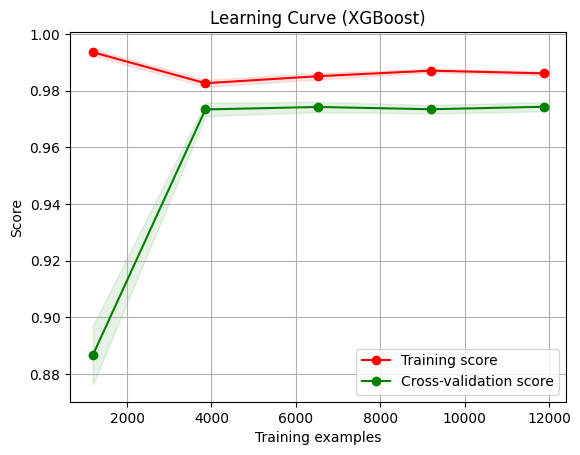

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

# Menggunakan StratifiedKFold untuk menjaga proporsi kelas saat split data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Fungsi untuk plot learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plotting the learning curve untuk XGBoost
plot_learning_curve(xgb, "Learning Curve (XGBoost)", X, Y, cv=cv, n_jobs=-1)

# Tampilkan plot
plt.show()


## FIN